In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import gc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_score , recall_score, ConfusionMatrixDisplay

import nltk
nltk.download("stopwords")
from nltk import word_tokenize
from nltk.corpus import stopwords

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Dataset

In [2]:
names = ["stories_art-et-culture.csv",
         "stories_economie.csv",
         "stories_faits-divers.csv",
         "stories_marocains-du-monde.csv",
         "stories_medias.csv",
         "stories_orbites.csv",
         "stories_politique.csv",
         "stories_regions.csv",
         "stories_societe.csv",
         "stories_sport.csv",
         "stories_tamazight.csv"
        ]

train_data = pd.DataFrame()
test_data = pd.DataFrame()

for i in names:
    path = '/kaggle/input/hespress/'+i
    df = pd.read_csv(path, encoding='utf8')
    
    train_data = pd.concat([ train_data, df.loc[: int(df.shape[0]*0.8) - 1] ], ignore_index=True)
    test_data = pd.concat([ test_data, df.loc[ int(df.shape[0]*0.8):]], ignore_index=True)
    print(train_data.shape)
    print(test_data.shape)

(800, 7)
(200, 7)
(1600, 7)
(400, 7)
(2400, 7)
(600, 7)
(3200, 7)
(800, 7)
(4000, 7)
(1000, 7)
(4800, 7)
(1200, 7)
(5600, 7)
(1400, 7)
(6400, 7)
(1600, 7)
(7200, 7)
(1800, 7)
(8000, 7)
(2000, 7)
(8800, 7)
(2200, 7)


In [3]:
print(train_data.shape)
print(test_data.shape)

(8800, 7)
(2200, 7)


## Label encoder 

In [4]:
labels = {
    'art-et-culture':0,
     'economie':1,
     'faits-divers':2,
     'marocains-du-monde':3,
     'medias':4,
     'orbites':5,
     'politique':6,
     'regions':7,
     'societe':8,
     'sport':9,
     'tamazight':10
}

train_data["label"]=train_data.topic.map(labels)
test_data["label"]=test_data.topic.map(labels)

## spliting the data 

In [5]:
X = train_data.story
Y = train_data.label

X_test = test_data.story
Y_test = test_data.label

## Machine learning Models 

In [6]:
def model(model, X, Y):
    pip = Pipeline([
    ('vect', CountVectorizer(
        tokenizer = nltk.word_tokenize, 
        token_pattern = None,
        stop_words = stopwords.words("arabic"),
        analyzer = "word")),
    ('tfidf', TfidfTransformer()),
    ('clf', model),
    ])
    pip.fit(X, Y)
    return pip

In [7]:
labels = ['art-et-culture','economie','faits-divers','marocains-du-monde','medias','orbites','politique','regions','societe','sport','tamazight']

* Metrics used for evolution are: 
    * precision: It measures the proportion of correct positive predictions made by the model out of all positive predictions.
    * recall: It measures the proportion of actual positive instances that were correctly predicted as positive by the model. 
    * f-score: It provides a single score that balances the precision and recall of the model.  
    * accuracy: It is the ratio of correct predictions to the total number of predictions made by the model.

### 1. Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_clf = model(DecisionTreeClassifier(), X, Y)
print("Training Accurcy: " , accuracy_score(Y,decision_tree_clf.predict(X)))
print("Testing Accurcy: " , accuracy_score(Y_test,decision_tree_clf.predict(X_test)))

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['أفعل', 'أفعله', 'انفك', 'برح', 'سيما'] not in stop_words.
  warnings.warn(


Training Accurcy:  1.0
Testing Accurcy:  0.6


In [9]:
print("Training data matrices")
print(classification_report(Y,decision_tree_clf.predict(X)))

Training data matrices
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       800
           2       1.00      1.00      1.00       800
           3       1.00      1.00      1.00       800
           4       1.00      1.00      1.00       800
           5       1.00      1.00      1.00       800
           6       1.00      1.00      1.00       800
           7       1.00      1.00      1.00       800
           8       1.00      1.00      1.00       800
           9       1.00      1.00      1.00       800
          10       1.00      1.00      1.00       800

    accuracy                           1.00      8800
   macro avg       1.00      1.00      1.00      8800
weighted avg       1.00      1.00      1.00      8800



In [10]:
print("Testing data matrices")
print(classification_report(Y_test,decision_tree_clf.predict(X_test)))

Testing data matrices
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       200
           1       0.49      0.52      0.51       200
           2       0.80      0.83      0.82       200
           3       0.50      0.46      0.48       200
           4       0.75      0.66      0.70       200
           5       0.30      0.28      0.29       200
           6       0.45      0.56      0.50       200
           7       0.53      0.53      0.53       200
           8       0.44      0.40      0.42       200
           9       0.90      0.83      0.87       200
          10       0.86      0.83      0.85       200

    accuracy                           0.60      2200
   macro avg       0.60      0.60      0.60      2200
weighted avg       0.60      0.60      0.60      2200



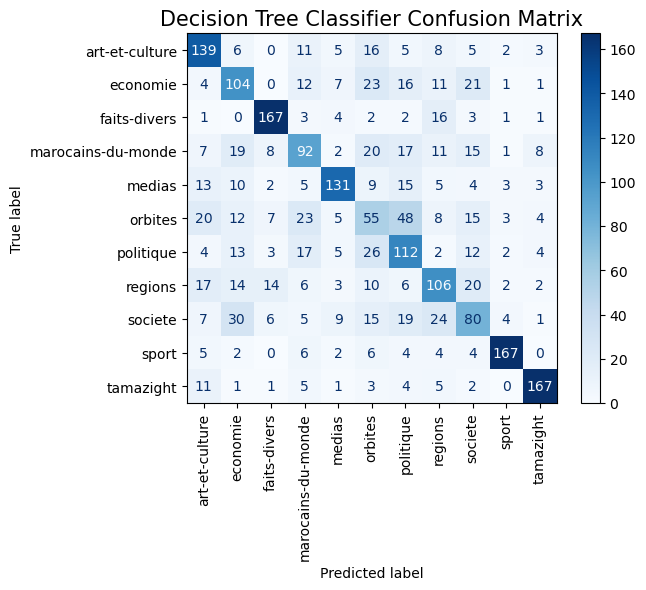

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,decision_tree_clf.predict(X_test)), display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation = 90)
plt.title('Decision Tree Classifier Confusion Matrix', size=15)
plt.show()

* the model is very overfitted 

### 2. Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB

multinomial_nb_clf = model(MultinomialNB(), X, Y)
print("Training Accurcy: " , accuracy_score(Y,multinomial_nb_clf.predict(X)))
print("Testing Accurcy: " , accuracy_score(Y_test,multinomial_nb_clf.predict(X_test)))

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['أفعل', 'أفعله', 'انفك', 'برح', 'سيما'] not in stop_words.
  warnings.warn(


Training Accurcy:  0.8994318181818182
Testing Accurcy:  0.7763636363636364


In [13]:
print("Training data matrices")
print(classification_report(Y,multinomial_nb_clf.predict(X)))

Training data matrices
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       800
           1       0.88      0.93      0.90       800
           2       0.97      0.94      0.95       800
           3       0.93      0.90      0.91       800
           4       0.74      0.98      0.85       800
           5       0.89      0.81      0.84       800
           6       0.86      0.92      0.89       800
           7       0.90      0.78      0.83       800
           8       0.86      0.77      0.81       800
           9       1.00      0.99      0.99       800
          10       0.95      0.98      0.97       800

    accuracy                           0.90      8800
   macro avg       0.90      0.90      0.90      8800
weighted avg       0.90      0.90      0.90      8800



In [14]:
print("Testing data matrices")
print(classification_report(Y_test,multinomial_nb_clf.predict(X_test)))

Testing data matrices
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       200
           1       0.80      0.84      0.82       200
           2       0.97      0.87      0.92       200
           3       0.81      0.61      0.70       200
           4       0.48      0.93      0.63       200
           5       0.68      0.50      0.58       200
           6       0.69      0.87      0.77       200
           7       0.88      0.68      0.77       200
           8       0.83      0.51      0.63       200
           9       0.99      0.94      0.96       200
          10       0.87      0.94      0.90       200

    accuracy                           0.78      2200
   macro avg       0.81      0.78      0.78      2200
weighted avg       0.81      0.78      0.78      2200



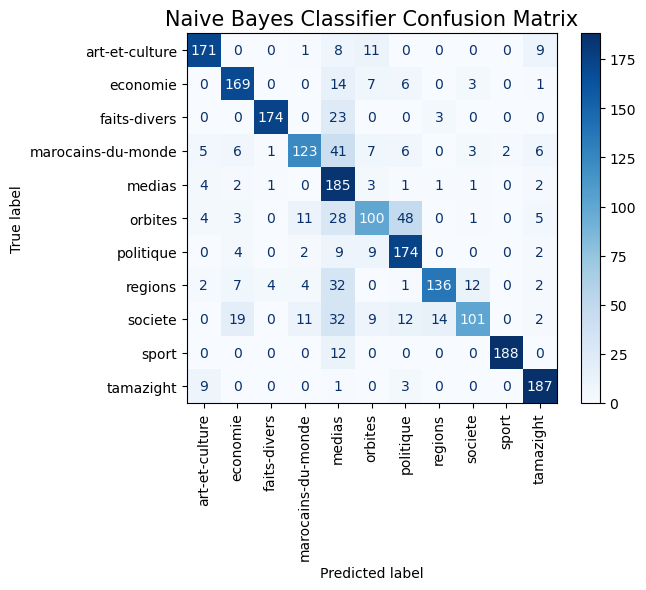

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,multinomial_nb_clf.predict(X_test)), display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation = 90)
plt.title('Naive Bayes Classifier Confusion Matrix', size=15)
plt.show()

* the model gives good generelization results based on the above matrices 

### 3. SVM


In [16]:
from sklearn.svm import LinearSVC
linearSVC_clf = model(LinearSVC(), X, Y)
print("Training Accurcy: " , accuracy_score(Y,linearSVC_clf.predict(X)))
print("Testing Accurcy: " , accuracy_score(Y_test,linearSVC_clf.predict(X_test)))

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['أفعل', 'أفعله', 'انفك', 'برح', 'سيما'] not in stop_words.
  warnings.warn(


Training Accurcy:  0.9998863636363636
Testing Accurcy:  0.8354545454545454


In [17]:
print("Training data matrices")
print(classification_report(Y,linearSVC_clf.predict(X)))

Training data matrices
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       800
           2       1.00      1.00      1.00       800
           3       1.00      1.00      1.00       800
           4       1.00      1.00      1.00       800
           5       1.00      1.00      1.00       800
           6       1.00      1.00      1.00       800
           7       1.00      1.00      1.00       800
           8       1.00      1.00      1.00       800
           9       1.00      1.00      1.00       800
          10       1.00      1.00      1.00       800

    accuracy                           1.00      8800
   macro avg       1.00      1.00      1.00      8800
weighted avg       1.00      1.00      1.00      8800



In [18]:
print("Testing data matrices")
print(classification_report(Y_test,linearSVC_clf.predict(X_test)))

Testing data matrices
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       200
           1       0.81      0.88      0.84       200
           2       0.92      0.96      0.94       200
           3       0.85      0.90      0.87       200
           4       0.93      0.87      0.90       200
           5       0.60      0.51      0.55       200
           6       0.68      0.81      0.74       200
           7       0.86      0.83      0.85       200
           8       0.79      0.59      0.68       200
           9       0.98      0.98      0.98       200
          10       0.95      0.94      0.95       200

    accuracy                           0.84      2200
   macro avg       0.83      0.84      0.83      2200
weighted avg       0.83      0.84      0.83      2200



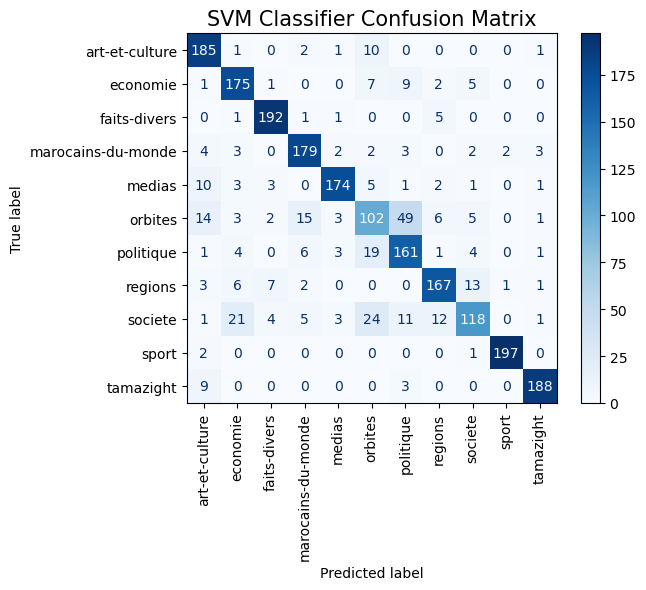

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,linearSVC_clf.predict(X_test)), display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation = 90)
plt.title('SVM Classifier Confusion Matrix', size=15)
plt.show()

* the model is overfitted

### 4. Random Forest Classifier


In [20]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = model(RandomForestClassifier(), X, Y)
print("Training Accurcy: " , accuracy_score(Y,random_forest_clf.predict(X)))
print("Testing Accurcy: " , accuracy_score(Y_test,random_forest_clf.predict(X_test)))

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['أفعل', 'أفعله', 'انفك', 'برح', 'سيما'] not in stop_words.
  warnings.warn(


Training Accurcy:  1.0
Testing Accurcy:  0.7704545454545455


In [21]:
print("Training data matrices")
print(classification_report(Y,random_forest_clf.predict(X)))

Training data matrices
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       800
           2       1.00      1.00      1.00       800
           3       1.00      1.00      1.00       800
           4       1.00      1.00      1.00       800
           5       1.00      1.00      1.00       800
           6       1.00      1.00      1.00       800
           7       1.00      1.00      1.00       800
           8       1.00      1.00      1.00       800
           9       1.00      1.00      1.00       800
          10       1.00      1.00      1.00       800

    accuracy                           1.00      8800
   macro avg       1.00      1.00      1.00      8800
weighted avg       1.00      1.00      1.00      8800



In [22]:
print("Testing data matrices")
print(classification_report(Y_test,random_forest_clf.predict(X_test)))

Testing data matrices
              precision    recall  f1-score   support

           0       0.66      0.95      0.78       200
           1       0.68      0.83      0.75       200
           2       0.85      0.96      0.90       200
           3       0.79      0.80      0.79       200
           4       0.92      0.79      0.85       200
           5       0.62      0.34      0.44       200
           6       0.62      0.81      0.70       200
           7       0.76      0.75      0.76       200
           8       0.76      0.41      0.53       200
           9       0.96      0.96      0.96       200
          10       0.92      0.87      0.89       200

    accuracy                           0.77      2200
   macro avg       0.78      0.77      0.76      2200
weighted avg       0.78      0.77      0.76      2200



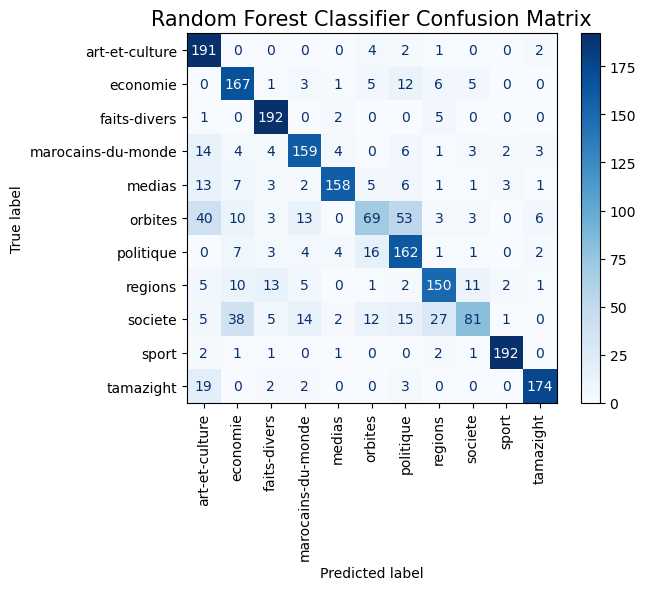

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,random_forest_clf.predict(X_test)), display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation = 90)
plt.title('Random Forest Classifier Confusion Matrix', size=15)
plt.show()

* the model is overfitted

# Deep Learning Method

In [24]:
import pandas as pd 
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Toknize the data 

In [25]:
# Tokenize the input text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
x_train = tokenizer.texts_to_sequences(X)
x_test = tokenizer.texts_to_sequences(X_test)
# Pad the input sequences to have the same length
max_sequence_length = max(len(seq) for seq in x_train)
x_train = pad_sequences(x_train, maxlen=max_sequence_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_sequence_length, padding='post')

## Train the model 

In [26]:
def make_model(max_sequence_length, tokenizer):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=256, input_length=max_sequence_length))
    model.add(layers.Bidirectional(layers.LSTM(256, dropout=0.7)))
    model.add(Dense(1024))
    model.add(Dropout(0.6)) 
    model.add(Dense(11, activation='softmax'))
    return model

In [27]:
checkpoint_filepath = 'best_weights.h5'
checkpoint_callback = ModelCheckpoint(checkpoint_filepath, monitor='val_accuracy',
                                      save_best_only=True, mode='max', verbose=1)

In [28]:
#with strategy.scope():
model = make_model(max_sequence_length, tokenizer)
model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, Y, validation_split = 0.05, epochs=4,batch_size=64, callbacks=[checkpoint_callback])

Epoch 1/4
131/131 [==============================] - ETA: 0s - loss: 3.8358 - accuracy: 0.2231
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_weights.h5
131/131 [==============================] - 144s 1s/step - loss: 3.8358 - accuracy: 0.2231 - val_loss: 13.2001 - val_accuracy: 0.0000e+00
Epoch 2/4
131/131 [==============================] - ETA: 0s - loss: 2.5838 - accuracy: 0.4182
Epoch 2: val_accuracy improved from 0.00000 to 0.88182, saving model to best_weights.h5
131/131 [==============================] - 137s 1s/step - loss: 2.5838 - accuracy: 0.4182 - val_loss: 0.4283 - val_accuracy: 0.8818
Epoch 3/4
131/131 [==============================] - ETA: 0s - loss: 1.3371 - accuracy: 0.6299
Epoch 3: val_accuracy did not improve from 0.88182
131/131 [==============================] - 136s 1s/step - loss: 1.3371 - accuracy: 0.6299 - val_loss: 4.5493 - val_accuracy: 0.0023
Epoch 4/4
131/131 [==============================] - ETA: 0s - loss: 0.7854 - accuracy: 0.

## Evaluate the model 

In [29]:
model.evaluate(x_train, Y)

275/275 [==============================] - 85s 310ms/step - loss: 0.5766 - accuracy: 0.8459


[0.5766304731369019, 0.8459091186523438]

In [30]:
model.evaluate(x_test, Y_test)

69/69 [==============================] - 21s 309ms/step - loss: 1.4158 - accuracy: 0.6350


[1.4157555103302002, 0.6349999904632568]

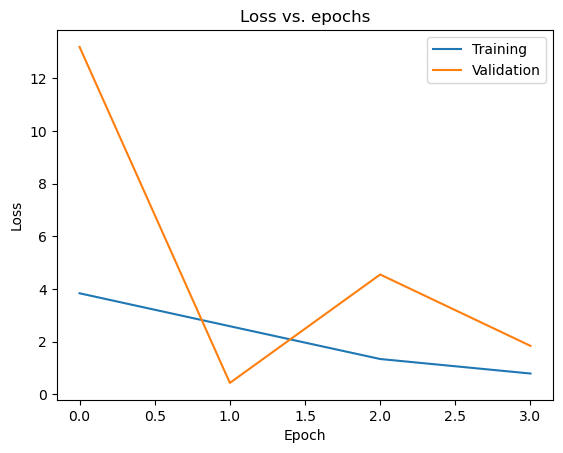

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

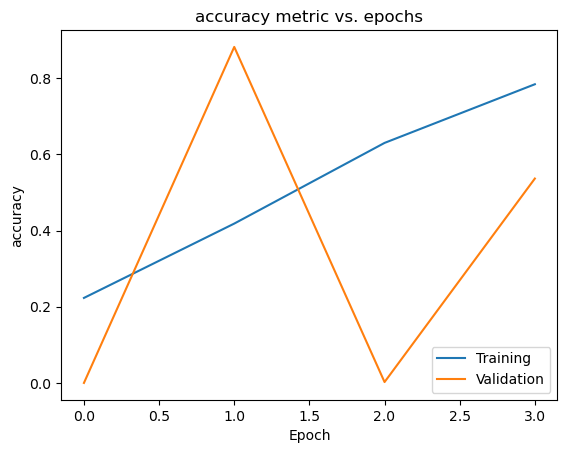

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy metric vs. epochs')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

* the model is overfitting.
* the data needs more advanced techniques to tokinize arabic languages, this might increase the accurcy 
* hyperparameters tuning is needed